In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# 1 Dataset

In [2]:
data = pd.read_csv("./cirrhosis.csv")
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


- `ID`: unique identifier

- `N_Days`: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
- `Status`: status of the patient: C (censored), CL (censored due to liver tx), or D (death)
- `Drug`: type of drug: D-penicillamine or placebo
- `Age`: age in days
- `Sex`: M (male) or F (female)
- `Ascites`: presence of ascites: N (No) or Y (Yes)
- `Hepatomegaly`: presence of hepatomegaly: N (No) or Y (Yes)
- `Spiders`: presence of spiders: N (No) or Y (Yes)
- `Edema`: presence of edema: N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
- `Bilirubin`: serum bilirubin (mg/dl)
- `Cholesterol`: serum cholesterol (mg/dl)
- `Albumin`: albumin (gm/dl)
- `Copper`: urine copper (ug/day)
- `Alk_Phos`: alkaline phosphatase (U/liter)
- `SGOT`: SGOT (U/ml)
- `Tryglicerides`: tryglicerides
- `Platelets`: platelets per cubic ml/1000
- `Prothrombin`: prothrombin time (s)
- `Stage`: histologic stage of disease (1, 2, 3, or 4)


In [3]:
instance, features = data.shape
print(f'We have {features} features and {instance} instances.')

We have 20 features and 418 instances.


In [4]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(f'For numeric features: {numeric_features}')
print(f'For string features: {categorical_features}')

For numeric features: ['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
For string features: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


# 2 Data Cleaning
## 2.1 Null Values 

In [5]:
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

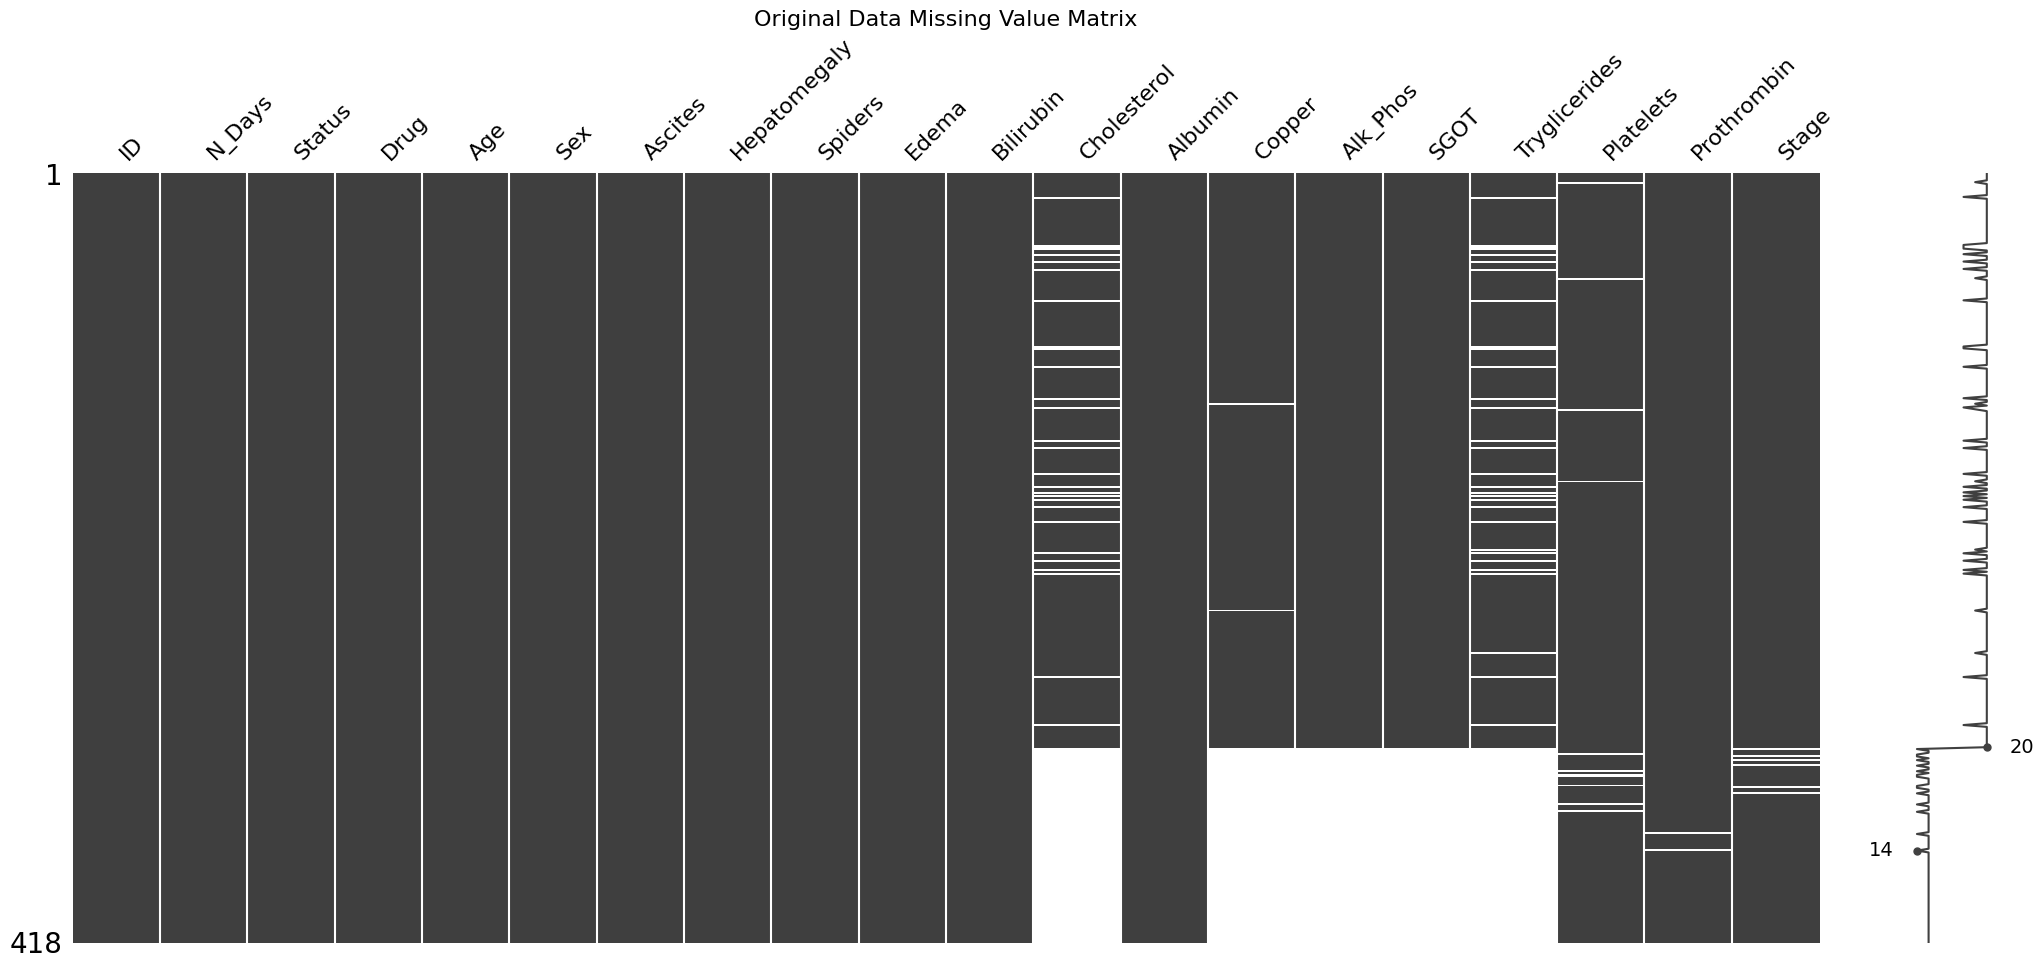

In [42]:
msno.matrix(data)
plt.title("Original Data Missing Value Matrix", fontsize=16)
plt.show()

In [7]:
for column in missing_values_int:
    skewness = data[column].skew()
    print(f"[{column:<13}] skewness: {skewness:.4f}")

[Cholesterol  ] skewness: 3.4085
[Copper       ] skewness: 2.3036
[Alk_Phos     ] skewness: 2.9928
[SGOT         ] skewness: 1.4492
[Tryglicerides] skewness: 2.5239
[Platelets    ] skewness: 0.6271
[Prothrombin  ] skewness: 2.2233
[Stage        ] skewness: -0.4963


Given the skewness values, it’s recommended to use `Median` to fill missing values for most columns, as the data is generally right-skewed, with the exception of `Stage`, which is likely categorical so that `Mode` is more appropriate. 

In [8]:
for column in missing_values_obj:
    data[column].fillna('na', inplace=True)
    print(data.groupby(column)['Status'].count())
    print()

Drug
D-penicillamine    158
Placebo            154
na                 106
Name: Status, dtype: int64

Ascites
N     288
Y      24
na    106
Name: Status, dtype: int64

Hepatomegaly
N     152
Y     160
na    106
Name: Status, dtype: int64

Spiders
N     222
Y      90
na    106
Name: Status, dtype: int64



In these columns, the proportion of missing values ​​is similar to that of other categories. I don't think it is a good idea to drop them or use median instead.

In [9]:
data.duplicated().sum()

0

# 3 Data visualization

In [10]:
# colors = ['#92A5D1', '#C5DEF4', '#D9B9D4', '#AEB2D1', '#7C9895', '#C9DCC4', '#DAA87C', '#F4EEAC']
colors = ['#7DAEE0', '#B395BD', '#EA8379']

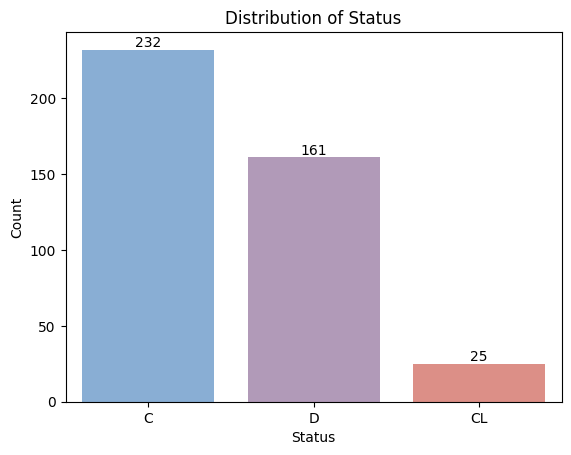

In [22]:
samples = data['Status'].value_counts()

sns.barplot(x=samples.index, y=samples.values, palette=colors[:len(samples.index)])
for i, value in enumerate(samples.values):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.show()

## 3.1 Numerical Features

In [12]:
data[numeric_features[1:]].describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


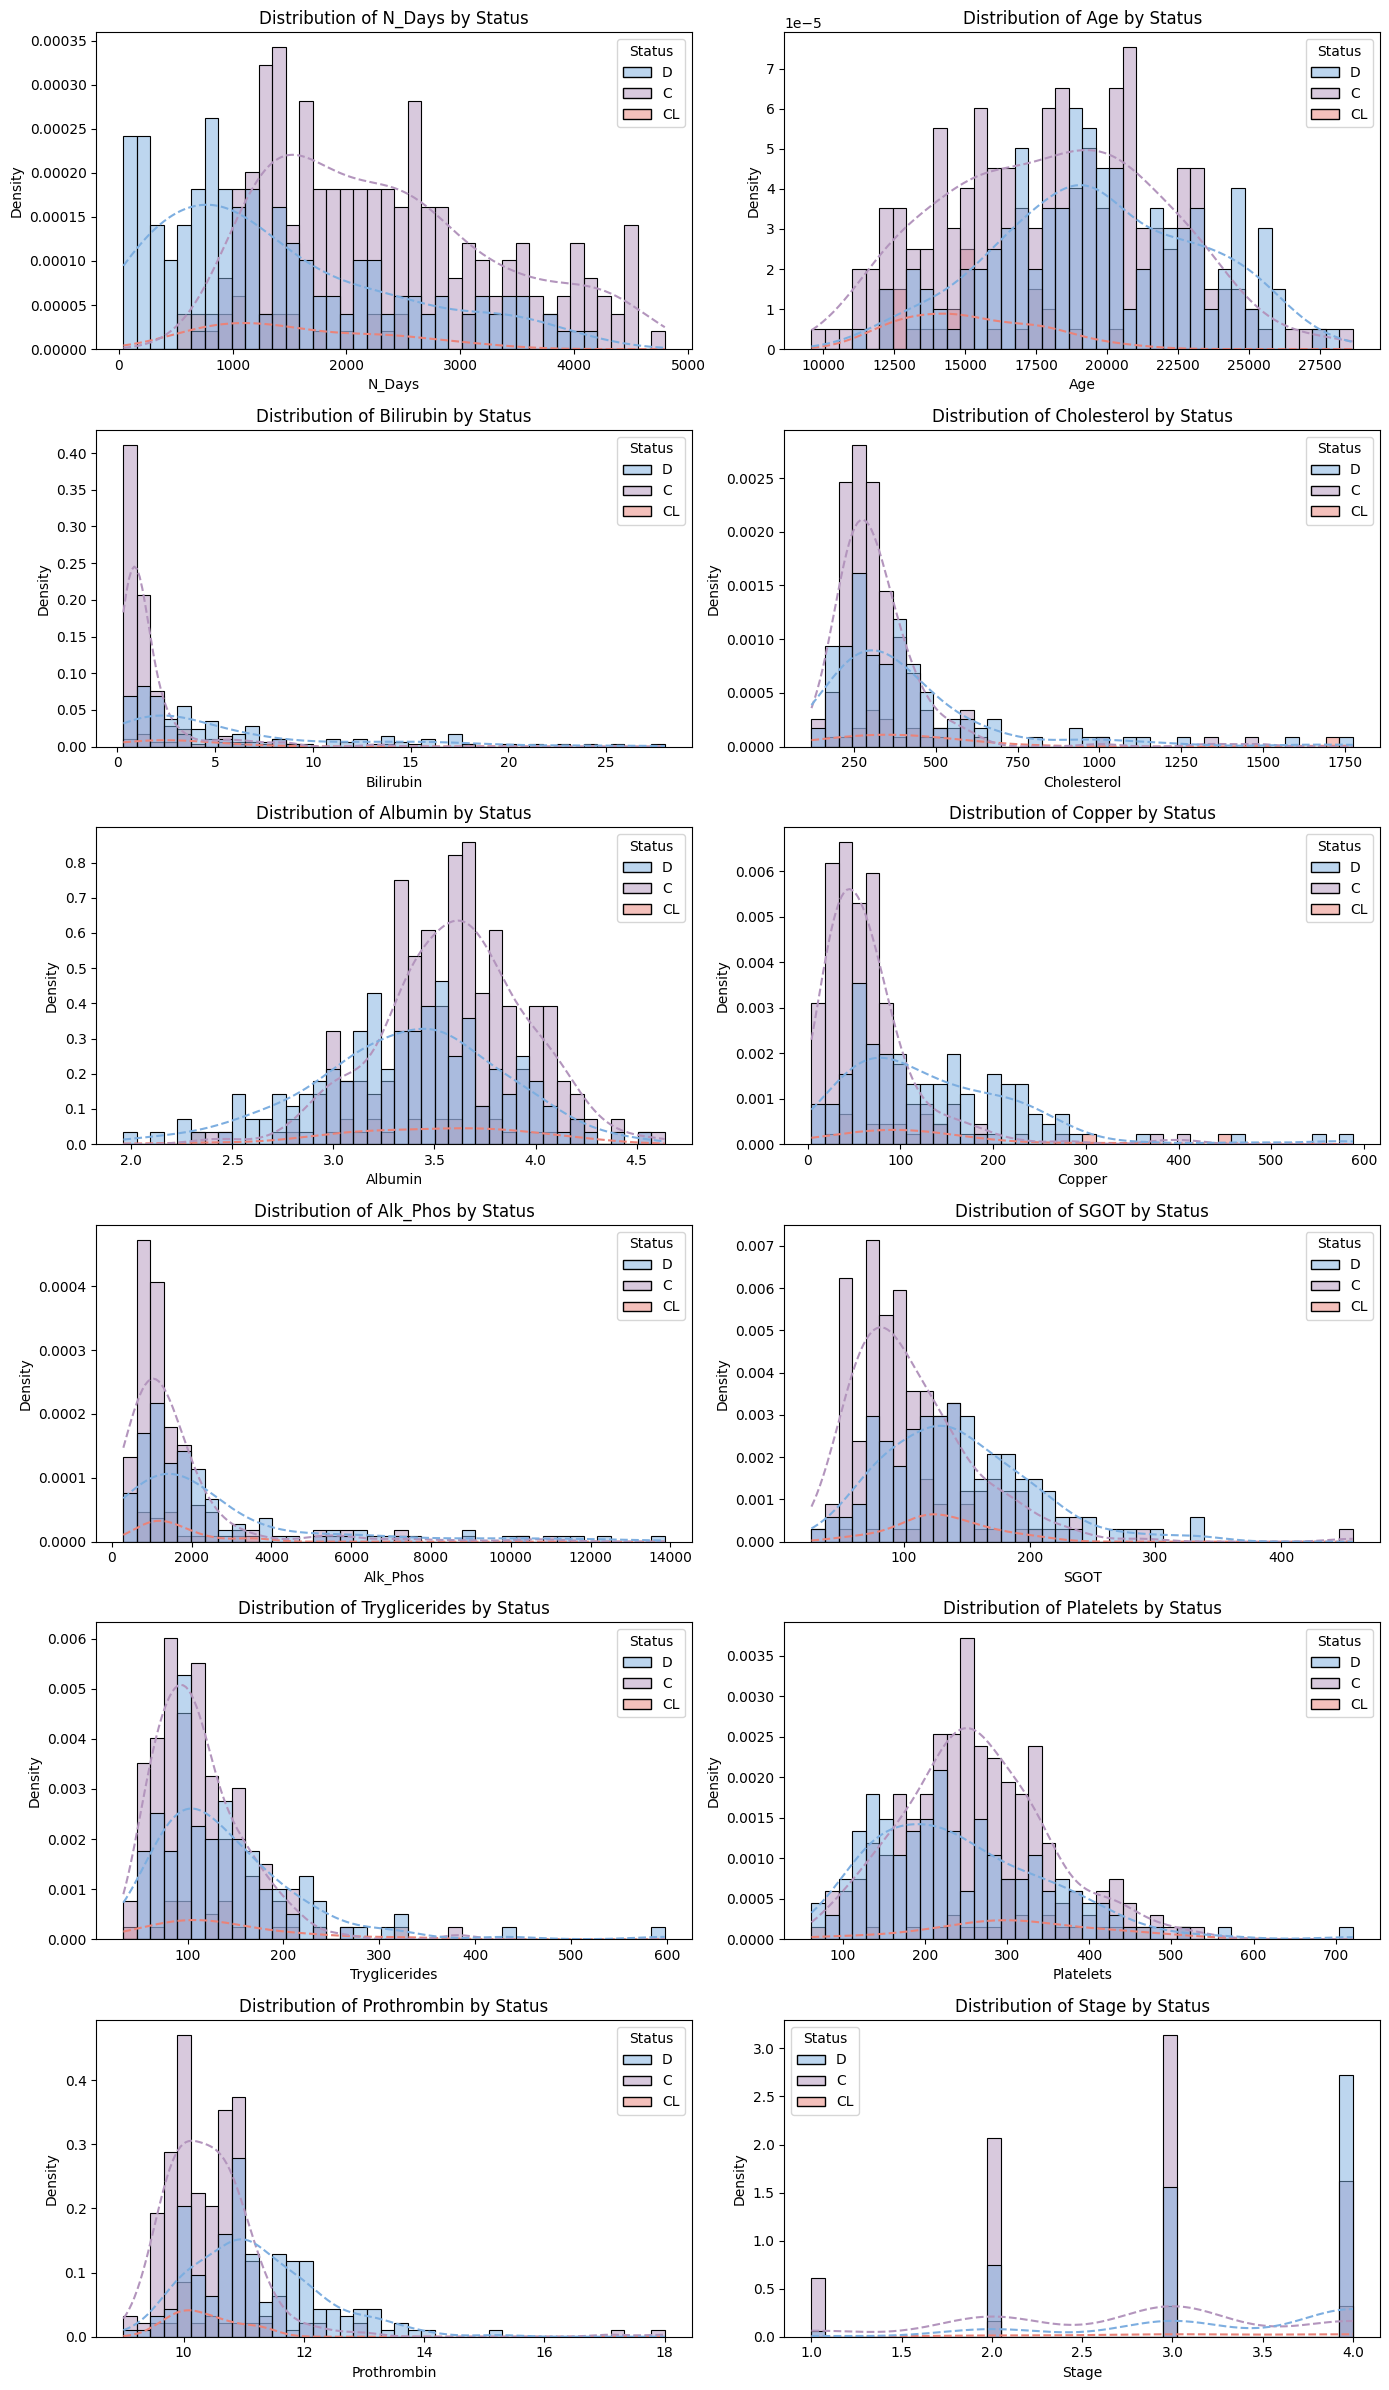

In [13]:
fig, axes = plt.subplots(6, 2, figsize=(14, 24))
axes = axes.flatten()
status_colors = colors
color_dict = dict(zip(data['Status'].unique(), status_colors))

for i, feature in enumerate(numeric_features[1:]):
    sns.histplot(
        data=data, 
        x=feature, 
        hue='Status',
        multiple="layer",
        stat='density',
        alpha=0.5, 
        bins=40,
        kde=True, 
        line_kws={'linestyle': '--'}, 
        ax=axes[i],
        palette=color_dict
    )
    
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of {feature} by Status')
    

plt.tight_layout()
plt.show()

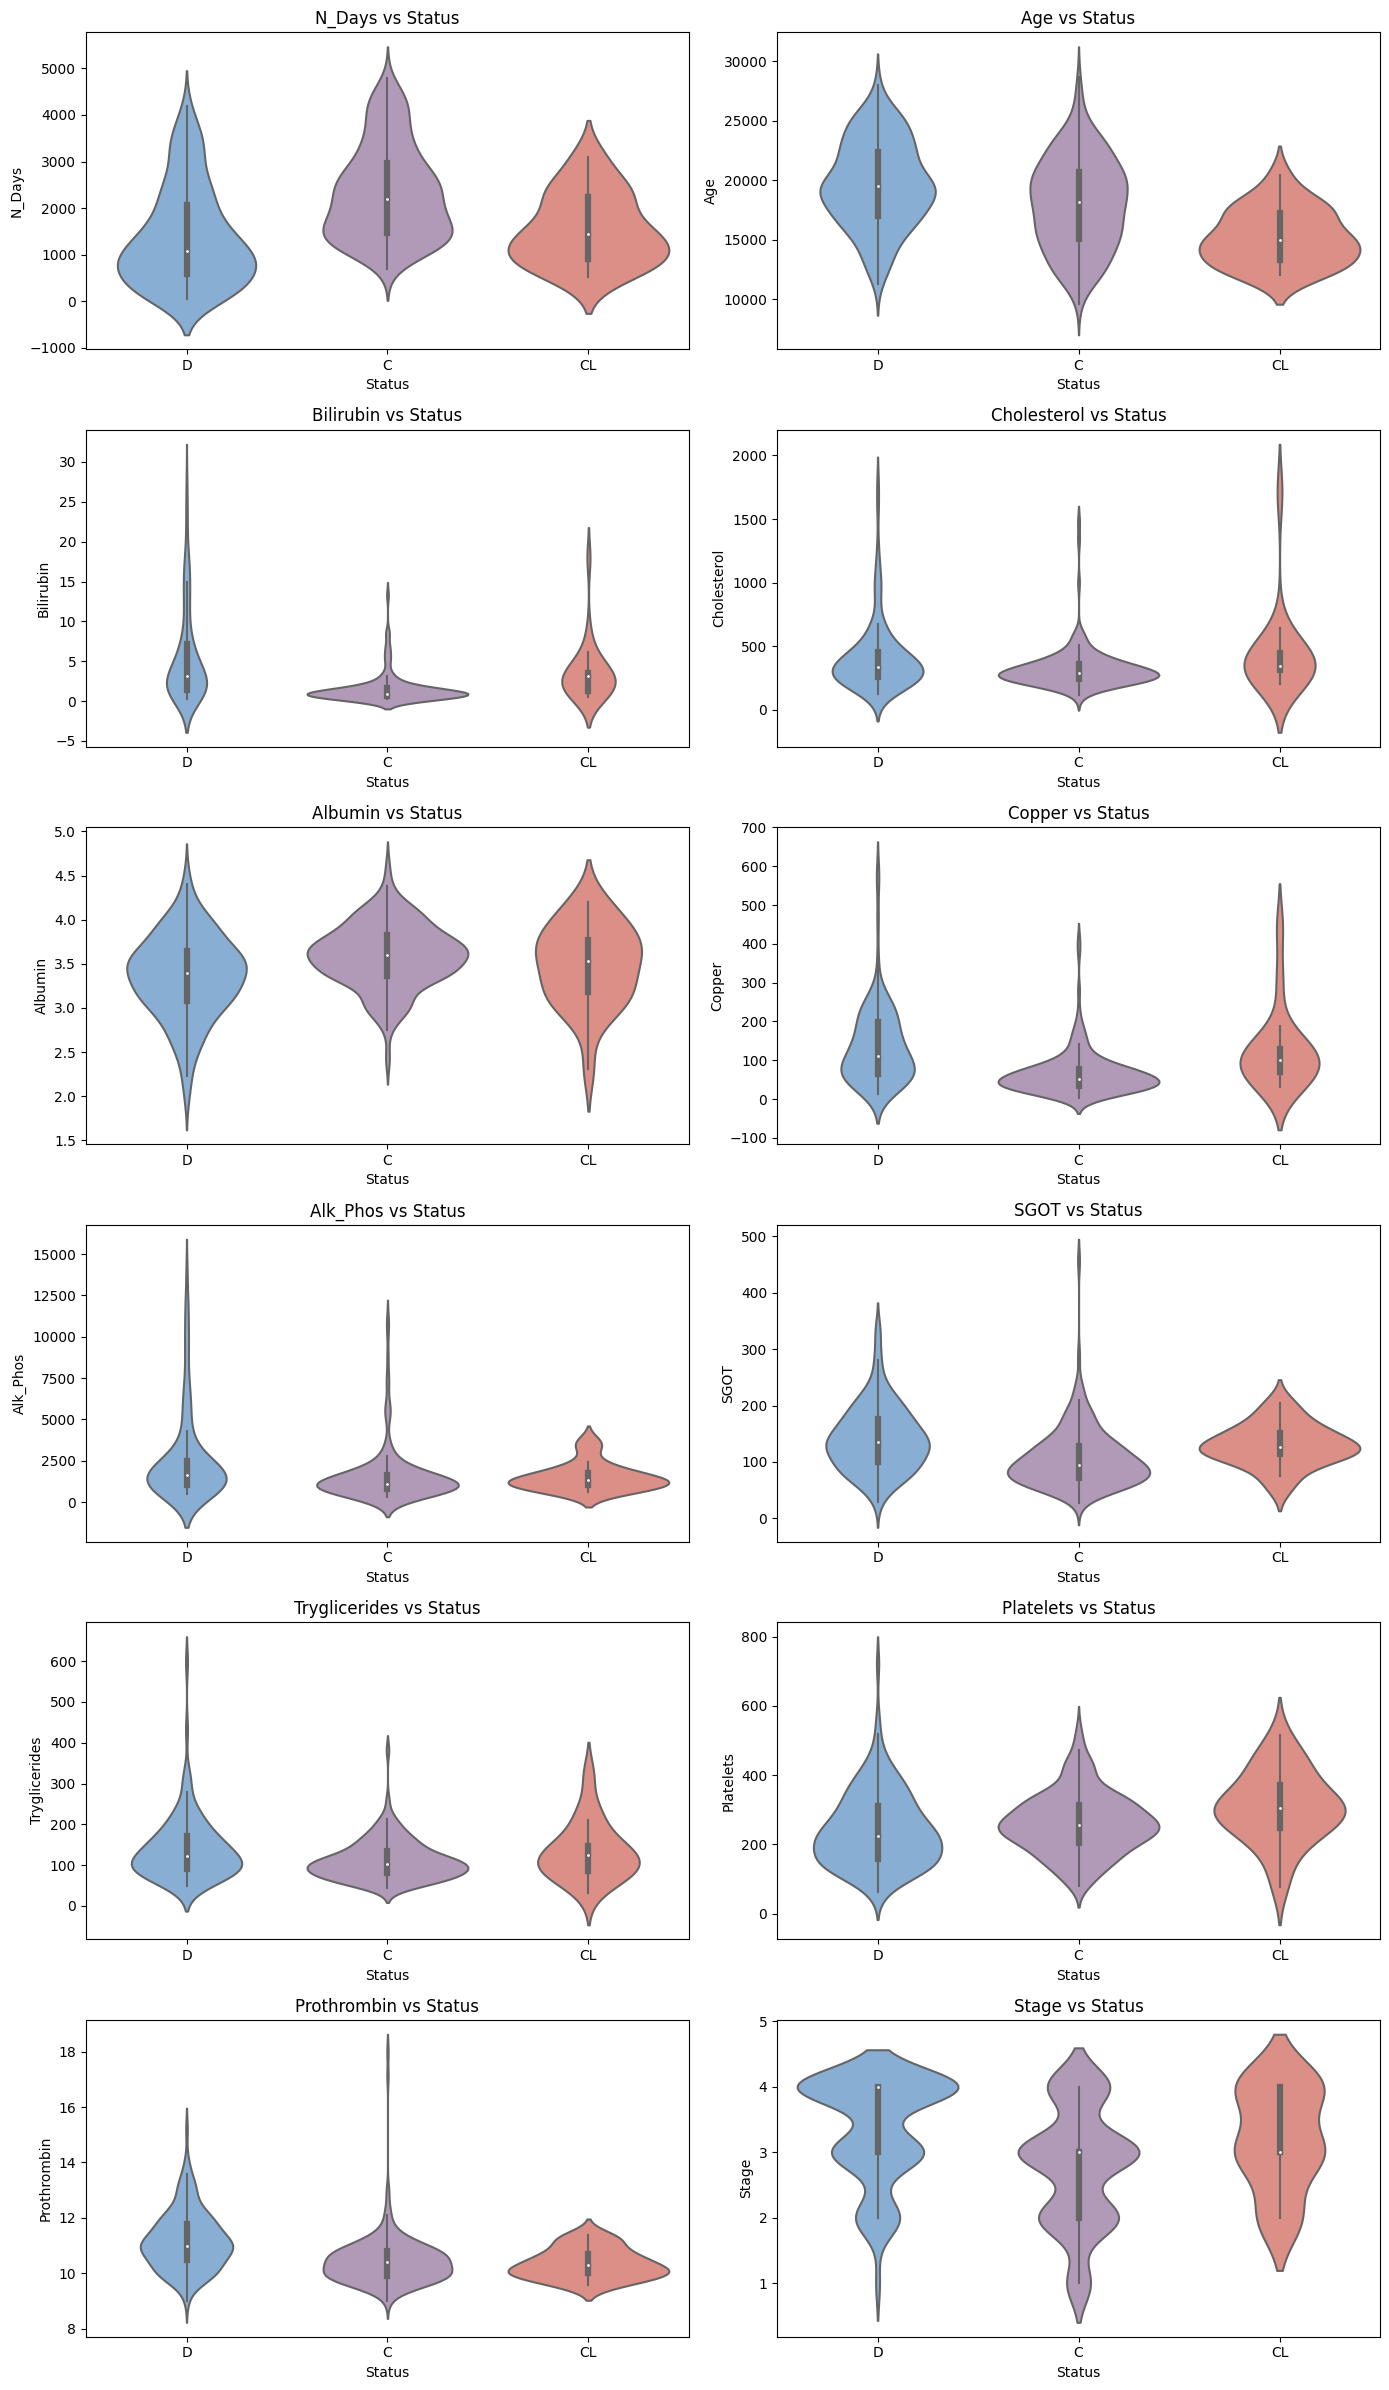

In [29]:
fig, axes = plt.subplots(6, 2, figsize=(14, 24))
axes = axes.flatten()

for i, feature in enumerate(numeric_features[1:]):
    sns.violinplot(x='Status', y=feature, data=data, ax=axes[i], palette=colors)
    axes[i].set_title(f"{feature} vs Status")
plt.tight_layout()
plt.show()

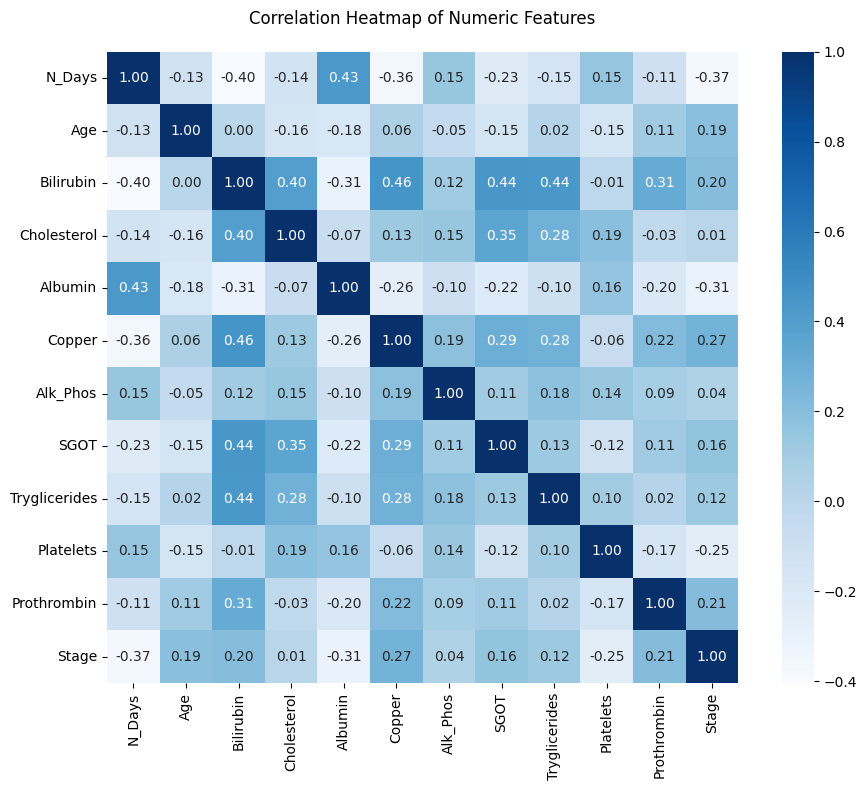

In [36]:
correlation_matrix = data[numeric_features[1:]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True, cbar=True)

plt.title('Correlation Heatmap of Numeric Features', pad=20)
plt.tight_layout()
plt.show()

* There is a moderate positive correlation between `N_Days` and `Albumin` (approximately 0.43).

* A significant positive correlation exists between `Bilirubin` and `Copper` (about 0.46) and between `Bilirubin` and `SGOT` (around 0.44).
* There is a negative correlation between `Albumin` and `Stage` (-0.31), suggesting that higher `Albumin` levels may be associated with lower disease stages.
* Other features show weak or negligible correlations with most variables, indicating little to no linear relationship.

## 3.2 Categorical Features

In [14]:
data[categorical_features[1:]].nunique()

Drug            3
Sex             2
Ascites         3
Hepatomegaly    3
Spiders         3
Edema           3
dtype: int64

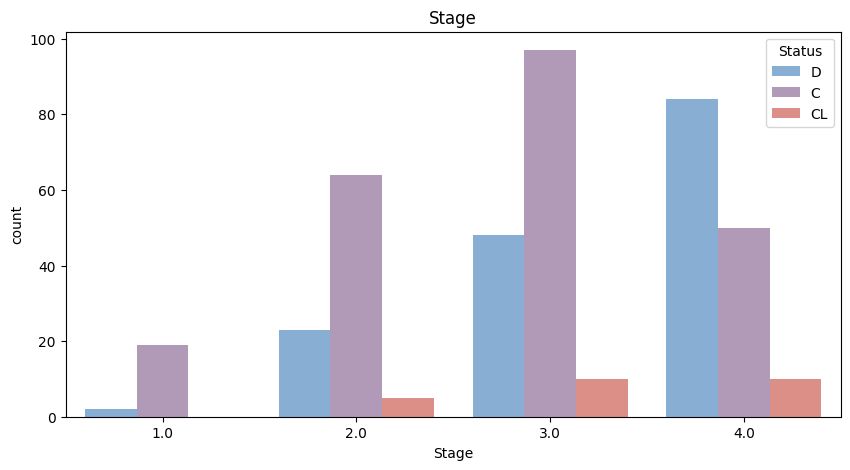

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Stage', hue='Status', data=data, palette=colors)
plt.title('Stage')
plt.show()

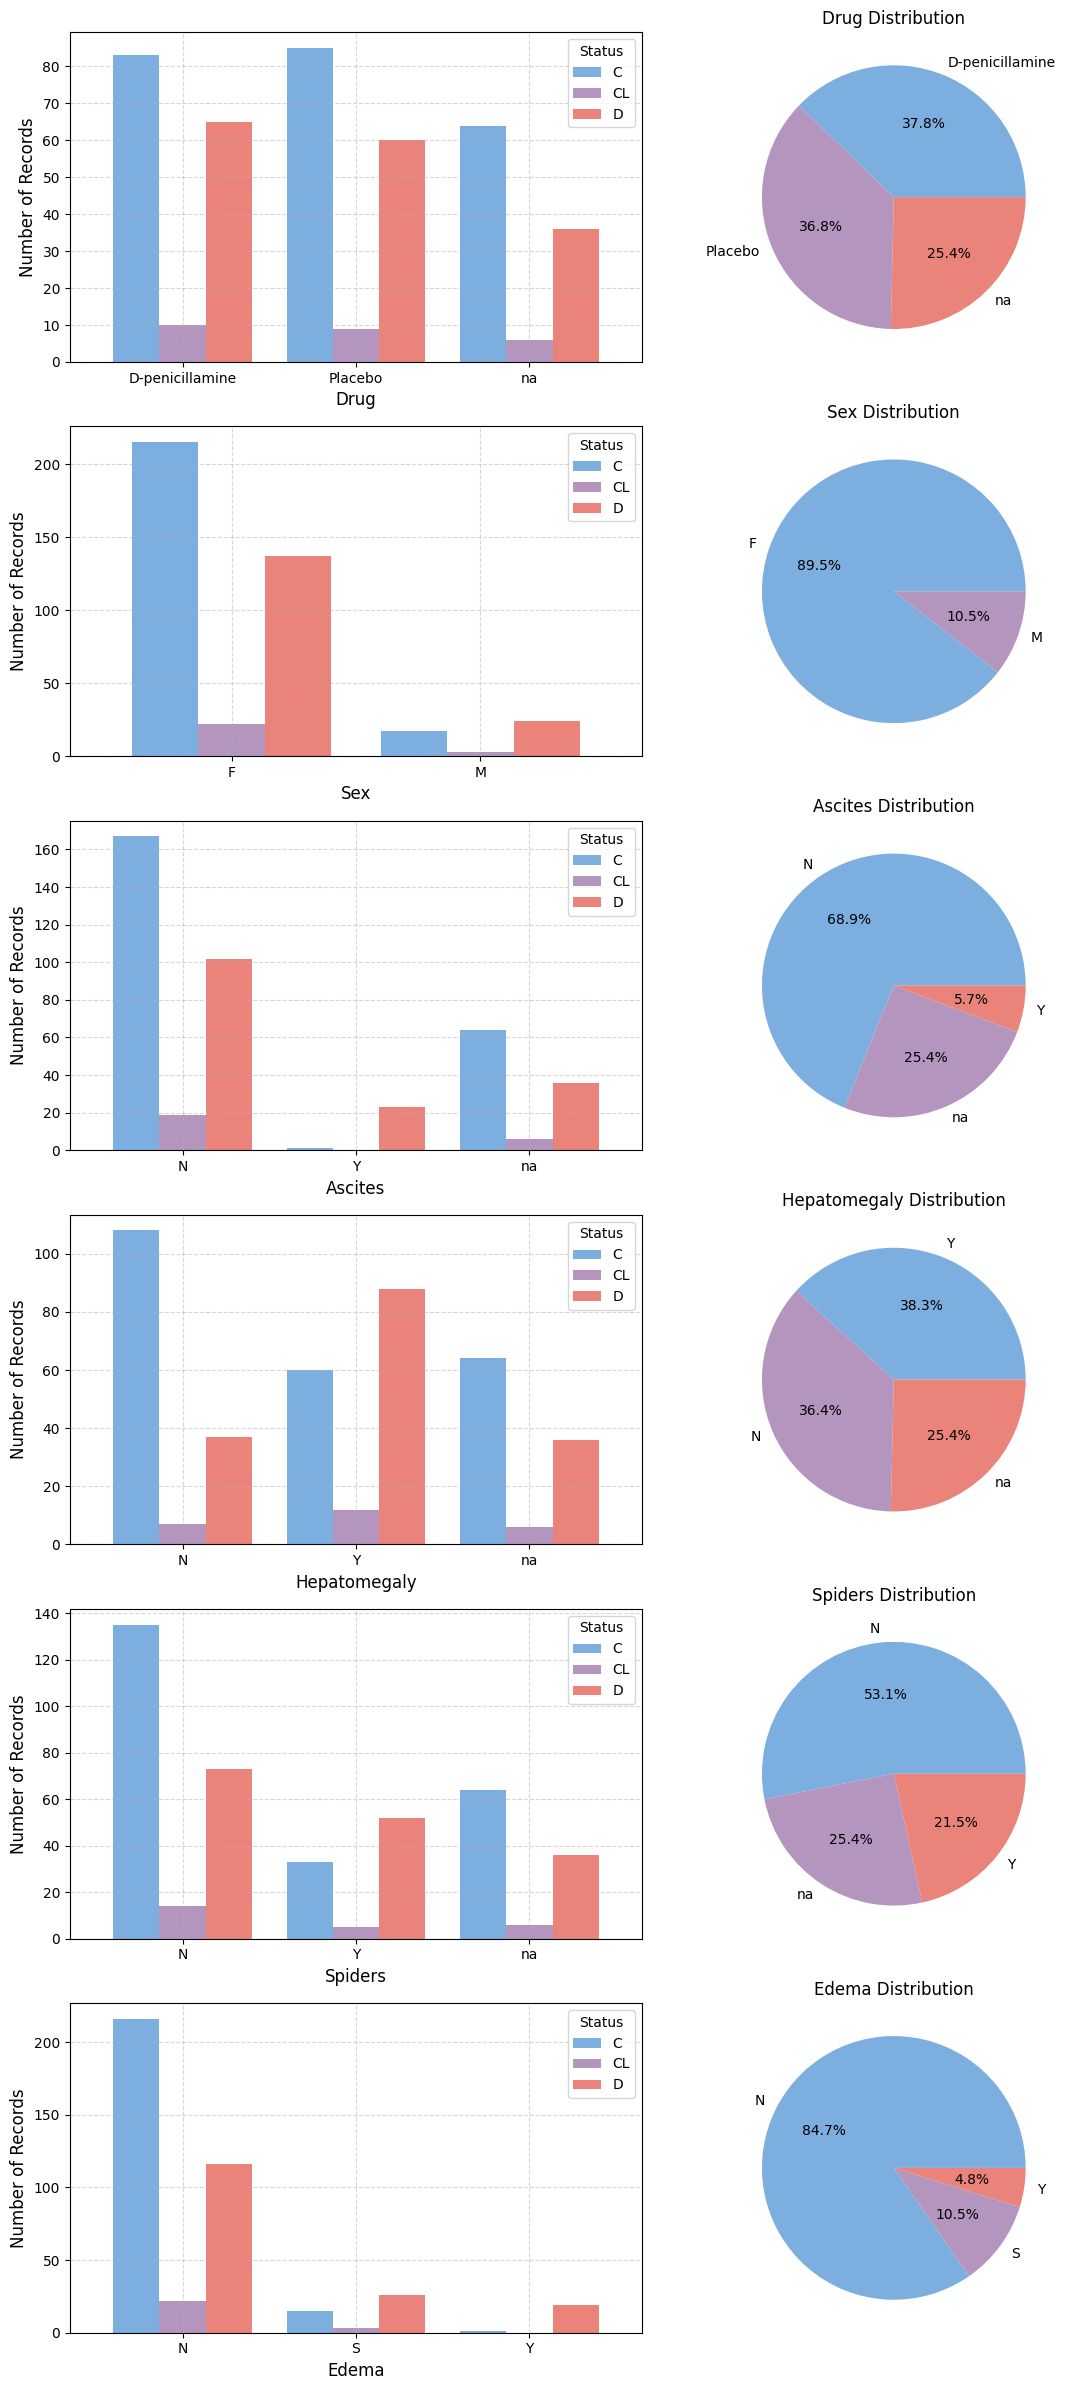

In [16]:
fig, axes = plt.subplots(6, 2, figsize=(12, 24))
axes = axes.flatten()

for i, feature in enumerate(categorical_features[1:]):
    counts = data[feature].value_counts()
    grouped_counts = data.groupby([feature, 'Status']).size().unstack(fill_value=0)
    grouped_counts.plot(kind='bar', width=0.8, color=colors, ax=axes[2 * i])
    
    axes[2 * i].set_xlabel(feature, fontsize=12)
    axes[2 * i].set_ylabel('Number of Records', fontsize=12)
    axes[2 * i].grid(linestyle='--', alpha=0.5)
    axes[2 * i].tick_params(axis='x', rotation=0)

    axes[2 * i + 1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=colors[-3:])
    axes[2 * i + 1].set_title(f'{feature} Distribution', fontsize=12)

plt.tight_layout()
plt.show()


# 4 Create New Feature

In [48]:
dataModified = data.copy()
dataModified['DiagnosedDay'] = dataModified['Age'] - dataModified['N_Days']
dataModified['Age_Group'] = pd.cut(
    round(dataModified['Age'] / 365.25).astype("int16"),
    bins=[19, 29, 39, 49, 59, 69, 99], 
    labels=[0, 1, 2, 3, 4, 5]
).astype('int16')
dataModified['BARatio'] = dataModified['Bilirubin'] / dataModified['Albumin']
dataModified['CARatio'] = dataModified['Copper'] / dataModified['Albumin']
dataModified['RiskScore'] = dataModified['Bilirubin'] + dataModified['Albumin'] - dataModified['Alk_Phos']

dataModified['Ascites_Numeric'] = dataModified['Ascites'].map({'N': 1, 'Y': 2})
dataModified['Hepatomegaly_Numeric'] = dataModified['Hepatomegaly'].map({'N': 1, 'Y': 2})
dataModified['Spiders_Numeric'] = dataModified['Spiders'].map({'N': 1, 'Y': 2})

dataModified['Liver_Complication_Index'] = (dataModified['Ascites_Numeric'] * dataModified['Hepatomegaly_Numeric'] * dataModified['Spiders_Numeric'])

* `diagnosedDay`: The estimated age of the patient at the time of diagnosis, calculated as the difference between Age (in days) and N_Days.

* `Age_Group`: Categorizes patients into age groups based on their age in years, divided into bins: 19-29, 30-39, 40-49, 50-59, 60-69, and 70-99, labeled as 0 to 5, respectively.
* `BARatio`: The ratio of serum bilirubin to albumin, which could be an indicator of liver function or disease severity.
* `CARatio`: The ratio of urine copper to albumin, potentially reflecting copper metabolism abnormalities or liver dysfunction.
* `RiskScore`: A calculated risk score based on a combination of bilirubin, albumin, and alkaline phosphatase levels, designed to assess the overall risk level associated with liver disease.
* `Liver_Complication_Index`: A composite index calculated as the product of Ascites_Numeric, Hepatomegaly_Numeric, and Spiders_Numeric, quantifying the overall severity of liver complications.

In [50]:
newFeature = ['DiagnosedDay', 'Age_Group', 'BARatio', 'CARatio', 'RiskScore', 'Liver_Complication_Index']
dataModified[newFeature].head()

,DiagnosedDay,Age_Group,BARatio,CARatio,RiskScore,Liver_Complication_Index
0,21064,3,5.576923,60.000000,-1700.90,8.0
1,16117,3,0.265700,13.043478,-7389.56,4.0
2,24582,5,0.402299,60.344828,-511.12,1.0
3,18069,3,0.708661,25.196850,-6117.46,4.0
4,12414,1,0.963173,40.509915,-664.07,4.0


In [51]:
dataModified[newFeature].describe()

,DiagnosedDay,Age_Group,BARatio,CARatio,RiskScore,Liver_Complication_Index
count,418.000000,418.000000,418.000000,310.000000,312.000000,312.000000
mean,16615.569378,2.631579,0.991796,29.060305,-1975.879679,2.233974
std,4103.981681,1.072060,1.449960,27.513585,2139.905936,1.595734
min,6727.000000,0.000000,0.073529,1.123596,-13857.500000,1.000000
25%,13487.250000,2.000000,0.224991,11.631378,-1963.510000,1.000000
50%,16645.000000,3.000000,0.390142,20.262318,-1254.445000,2.000000
75%,19615.250000,3.000000,1.008249,36.831900,-866.765000,2.000000
max,27630.000000,5.000000,8.588957,210.000000,-284.530000,8.000000
